In [1]:
import pandas as pd
import random
from sklearn import linear_model 
import matplotlib.pyplot as plt
import numpy as np
import math

# !pip install openpyxl


df=pd.read_excel("data/real_world/Delhi_dNdlogDp_Jan2017toMar2018.xlsx",engine='openpyxl')

In [2]:
df=df.dropna()
df = df.reset_index(drop=True)
df

,Unnamed: 0,12.6,13.1,13.6,14.1,14.6,15.1,15.7,16.3,16.8,...,399.5,414.2,429.4,445.1,461.4,478.3,495.8,514,532.8,552.3
0,2017-01-07 16:00:00,520.578226,661.462148,887.891226,1170.706175,1804.721299,1984.995689,2641.179228,3124.551601,3921.614287,...,6218.164536,5808.197662,5369.001317,4968.736421,4629.838070,4316.228680,4190.535460,3990.401499,3666.665038,3315.881447
1,2017-01-07 17:00:00,476.020024,488.419385,822.195986,1208.126079,1780.381524,2188.350319,2929.979619,3718.411051,4675.393714,...,5977.712495,5494.933234,5095.455937,4650.220591,4219.368827,4029.517218,3613.994220,3389.960827,3008.585168,2757.969859
2,2017-01-07 18:00:00,627.567015,596.026674,735.380819,1007.823177,1627.056660,2090.513935,2896.056348,3941.016137,4969.778459,...,6837.736175,6200.993411,5734.897819,5212.074781,4713.061859,4284.148127,3924.493123,3576.768624,3184.560126,2910.042786
3,2017-01-07 19:00:00,413.968004,414.462843,408.614268,531.138142,715.325753,1034.211480,1382.067535,1957.125032,2635.179401,...,6611.861469,5951.010695,5392.460996,4971.103172,4564.733495,4146.204603,3652.003049,3371.440345,3050.012777,2724.118328
4,2017-01-07 20:00:00,406.390137,241.412202,286.215267,467.506721,764.718817,1036.657035,1527.499237,2118.653559,2690.301548,...,6615.407554,6050.470077,5552.748893,5061.496012,4670.501018,4244.274906,3841.532175,3422.334663,3172.420781,2808.974491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,2018-04-02 19:00:00,34238.426909,37713.891200,37731.412950,40149.081278,43549.395663,44050.445912,45972.190587,47469.096422,48401.306302,...,1940.480032,1726.287351,1453.452395,1274.995454,1130.023991,987.828476,846.423399,721.441663,635.179491,537.612526
5664,2018-04-02 20:00:00,36580.517744,41046.780122,41731.729565,45185.067290,48404.564315,50854.622100,53303.778063,55850.208176,57367.793759,...,2223.198862,1969.764990,1709.324417,1485.739688,1297.870631,1095.148695,969.891119,835.674718,710.737129,621.396929
5665,2018-04-02 21:00:00,30549.115037,35147.157690,36427.365477,39929.250194,44302.669846,47317.023737,50282.306148,54206.877554,56760.795736,...,2435.715728,2148.827968,1877.507411,1608.137635,1410.341940,1232.686720,1079.621521,909.860538,785.759067,721.904685
5666,2018-04-02 22:00:00,15119.711386,17424.522195,19278.437339,21197.686633,24426.060561,26492.003392,29363.306823,32300.924600,34316.741097,...,2715.089615,2339.409710,2045.552499,1783.358591,1557.826868,1351.524096,1186.811613,1038.783999,884.464862,779.295080


In [3]:
sum=0
for size_particle in list(df.columns)[1:]:
    sum+=df[size_particle]
df["sum"]=sum

In [4]:
df.head(5)

,Unnamed: 0,12.6,13.1,13.6,14.1,14.6,15.1,15.7,16.3,16.8,...,414.2,429.4,445.1,461.4,478.3,495.8,514,532.8,552.3,sum
0,2017-01-07 16:00:00,520.578226,661.462148,887.891226,1170.706175,1804.721299,1984.995689,2641.179228,3124.551601,3921.614287,...,5808.197662,5369.001317,4968.736421,4629.838070,4316.228680,4190.535460,3990.401499,3666.665038,3315.881447,1.918482e+06
1,2017-01-07 17:00:00,476.020024,488.419385,822.195986,1208.126079,1780.381524,2188.350319,2929.979619,3718.411051,4675.393714,...,5494.933234,5095.455937,4650.220591,4219.368827,4029.517218,3613.994220,3389.960827,3008.585168,2757.969859,2.343658e+06
2,2017-01-07 18:00:00,627.567015,596.026674,735.380819,1007.823177,1627.056660,2090.513935,2896.056348,3941.016137,4969.778459,...,6200.993411,5734.897819,5212.074781,4713.061859,4284.148127,3924.493123,3576.768624,3184.560126,2910.042786,4.302701e+06
3,2017-01-07 19:00:00,413.968004,414.462843,408.614268,531.138142,715.325753,1034.211480,1382.067535,1957.125032,2635.179401,...,5951.010695,5392.460996,4971.103172,4564.733495,4146.204603,3652.003049,3371.440345,3050.012777,2724.118328,3.556590e+06
4,2017-01-07 20:00:00,406.390137,241.412202,286.215267,467.506721,764.718817,1036.657035,1527.499237,2118.653559,2690.301548,...,6050.470077,5552.748893,5061.496012,4670.501018,4244.274906,3841.532175,3422.334663,3172.420781,2808.974491,3.594536e+06


In [5]:

## these are the hyper parameters, change as reqd.

n=100000
start=1
end=1000
NOISE = 0.05 # noise coeff

# distributions (gaussian)
x_fac=0.001 # set to 1


# info1={"coeff":2.5,"mean":math.log(0.018,10),"variance":math.pow(math.log(1.60,10),2)}
# info2={"coeff":4.3,"mean":math.log(0.210,10),"variance":math.pow(math.log(1.80,10),2)}
# info3={"coeff":6.0,"mean":math.log(4.900,10),"variance":math.pow(math.log(1.87,10),2)}

info1={"coeff":1,"mean":math.log(0.01*1000,10),"variance":math.pow(math.log(1.60,10),2)} ##nm
info2={"coeff":1,"mean":math.log(0.05*1000,10),"variance":math.pow(math.log(1.60,10),2)}
info3={"coeff":1,"mean":math.log(0.25*1000,10),"variance":math.pow(math.log(1.60,10),2)}

graphs={"1":info1,"2":info2,"3":info3}

def gaussian(info=None,x=None,train=False):
    if info==None:
        coeff=1
        mean=0
        variance=1
    else:
        coeff=info["coeff"]
        mean=info["mean"]
        variance=info["variance"]
#         print(coeff)
    if train==True:
        coeff=1
    if x==None:
        x=np.random.rand()
    y=coeff*np.exp(-(math.log(x,10)-mean)**2/(2*variance))
    return y


def plotter(graphs,x,estm=None):
    y=[]
    for i in x:
        sum=0
        for num,key in enumerate(graphs.keys()):
            if estm!=None:
                graphs[key]["coeff"]=estm[num]
            sum+=gaussian(graphs[key],i)
        y.append(sum)
    return y


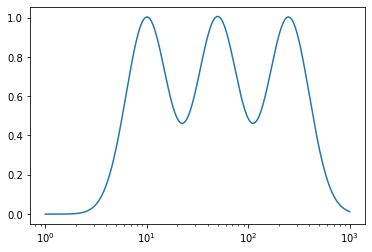

In [6]:
x=[]
y=[]

for i in range(n):
    x.append((i*(end-start)/n+start))
y=plotter(graphs,x)
plt.plot(x,y)
plt.xscale("log")

In [7]:
resolution=5
LOG_SCALE=True


all_sizes_particle=list(df.columns)[1:-1]

selected_sizes_particle=random.sample(all_sizes_particle,resolution)
train_x=selected_sizes_particle

In [12]:
INSTANCE=24
X=df[selected_sizes_particle].values
Y=selected_sizes_particle


train_data_x=[]
for t_x in train_x:
    temp=[]
    for key in graphs.keys():
        temp.append(gaussian(graphs[key],t_x,True))
    train_data_x.append(temp)
test_data_x=train_data_x[-1:]
test_data_y=X[INSTANCE][-1:]
train_data_y=X[INSTANCE]
train_data_x=train_data_x

[359775.14425695  25476.54775508  22934.36661357] 0.0


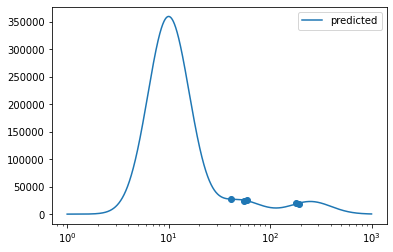

[358963.15181656  25480.04290424  22934.22434706] 0.0
nan


d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


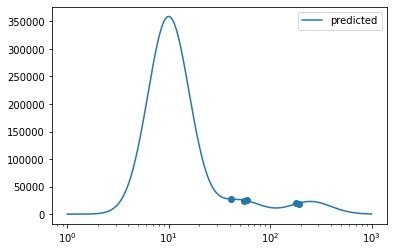

[ 2252.5236618  26925.8835561  22725.76983819] 0.0
nan


d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


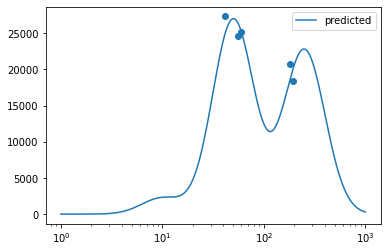

In [13]:

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(train_data_x, train_data_y)
print(reg.coef_,reg.intercept_)
# print(reg.score(test_data_x, test_data_y))
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
# plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
# plt.scatter(train_x[-1:],test_data_y)
plt.legend() 
if LOG_SCALE:
    plt.xscale("log")
# if SAVE:
#     plt.savefig('.\pic\Linear_reg_gr1.png',dpi=1200)

plt.show()

##
reg = linear_model.Lasso(alpha=0.01,fit_intercept=False) # positive=True
reg.fit(train_data_x, train_data_y)
print(reg.coef_,reg.intercept_)
print(reg.score(test_data_x, test_data_y))
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
# plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y-reg.intercept_)
# plt.scatter(train_x[-1:],test_data_y)
plt.legend()
if LOG_SCALE:
    plt.xscale("log")
# if SAVE:
#     plt.savefig('.\pic\Lasso_reg_gr1.png',dpi=1200)
plt.show()

##
reg = linear_model.Ridge(alpha=0.01,fit_intercept=False)
reg.fit(train_data_x, train_data_y)
print(reg.coef_,reg.intercept_)
print(reg.score(test_data_x, test_data_y))
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
# plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
# plt.scatter(train_x[-1:],test_data_y)
plt.legend()
if LOG_SCALE:
    plt.xscale("log") 
# if SAVE:
#     plt.savefig('.\pic\Ridge_reg_gr1.png',dpi=1200)

plt.show()

In [142]:
INSTANCE=4
X=df[selected_sizes_particle].values
Y=selected_sizes_particle


train_data_x=[]
for t_x in train_x:
    temp=[]
    for key in graphs.keys():
        temp.append(gaussian(graphs[key],t_x,True))
    train_data_x.append(temp)
test_data_x=train_data_x[-1:]
test_data_y=X[INSTANCE][-1:]
train_data_y=X[INSTANCE]
train_data_x=train_data_x


reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(train_data_x, train_data_y)
print(reg.coef_/np.sum(reg.coef_),reg.intercept_)

reg = linear_model.Lasso(alpha=0.01,fit_intercept=False) # positive=True
reg.fit(train_data_x, train_data_y)
print(reg.coef_/np.sum(reg.coef_),reg.intercept_)


reg = linear_model.Ridge(alpha=0.01,fit_intercept=False)
reg.fit(train_data_x, train_data_y)
print(reg.coef_/np.sum(reg.coef_),reg.intercept_)



[-0.0408938   0.76977777  0.27111602] 0.0
[-0.04089337  0.76977763  0.27111574] 0.0
[-0.03987476  0.76819267  0.27168209] 0.0


In [74]:
train_data_y

array([ 5185.75983927,  7509.41596704, 18256.38195144, 19232.34894403,
        4817.06805885])

In [76]:
selected_sizes_particle

[385.4, 322, 24.1, 31.1, 399.5]

In [83]:
train_x

[68.5, 94.7, 41.4, 21.7, 27.9]

In [85]:
train_data_y

array([24139.84849983, 28578.411457  , 20331.5721389 , 16232.03576669,
       18956.22185678])